# Customer Lifetime Value Analysis using Python

I’ll start this task by importing the necessary Python libraries and the dataset:

In [48]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv("customer_acquisition_data.csv")
print(data.head())


   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419


Let’s start by visualizing the distribution of acquisition cost and revenue generated by the customer using histograms:

In [50]:
fig = px.histogram(data, 
                   x="cost", 
                   nbins=20, 
                   title='Distribution of Acquisition Cost')
fig.show()

In [51]:
fig = px.histogram(data, 
                   x="revenue", 
                   nbins=20, 
                   title='Distribution of Revenue')
fig.show()

#### Now let’s compare the cost of acquisition across different channels and identify the most and least profitable channels:

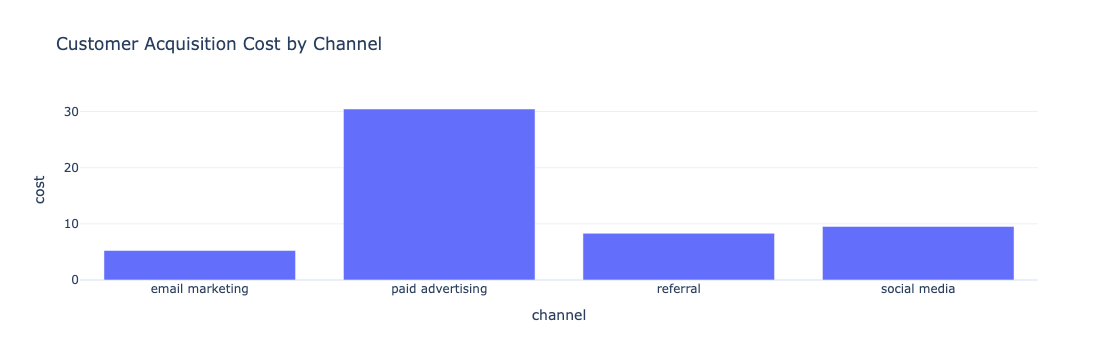

In [53]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

fig = px.bar(cost_by_channel, 
             x='channel', 
             y='cost', 
             title='Customer Acquisition Cost by Channel')
fig.show()

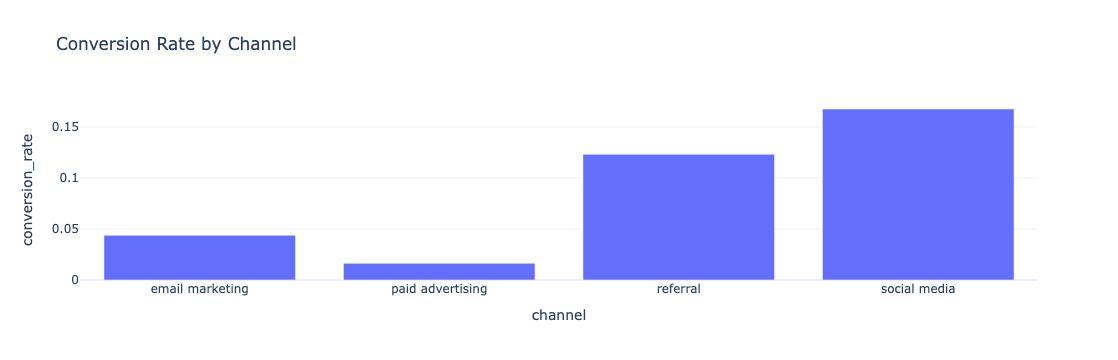

In [54]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()

fig = px.bar(conversion_by_channel, x='channel', 
             y='conversion_rate', 
             title='Conversion Rate by Channel')
fig.show()

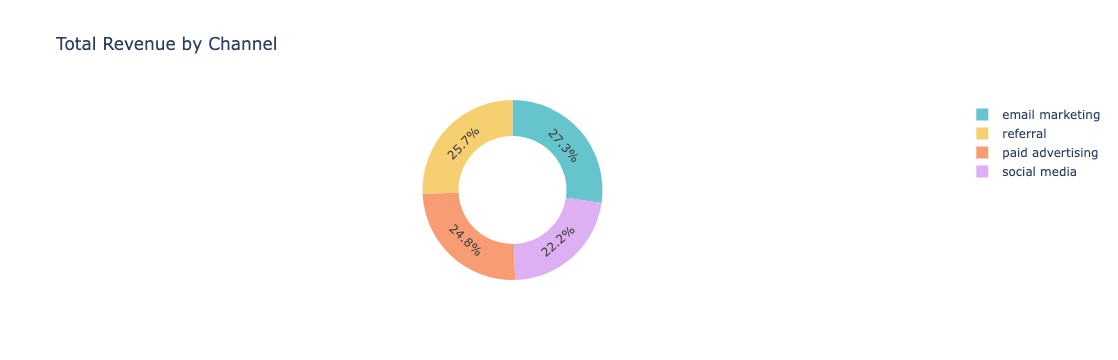

In [55]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

fig = px.pie(revenue_by_channel, 
             values='revenue', 
             names='channel', 
             title='Total Revenue by Channel', 
             hole=0.6, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

#### calculate the return on investment (ROI) for each channel:

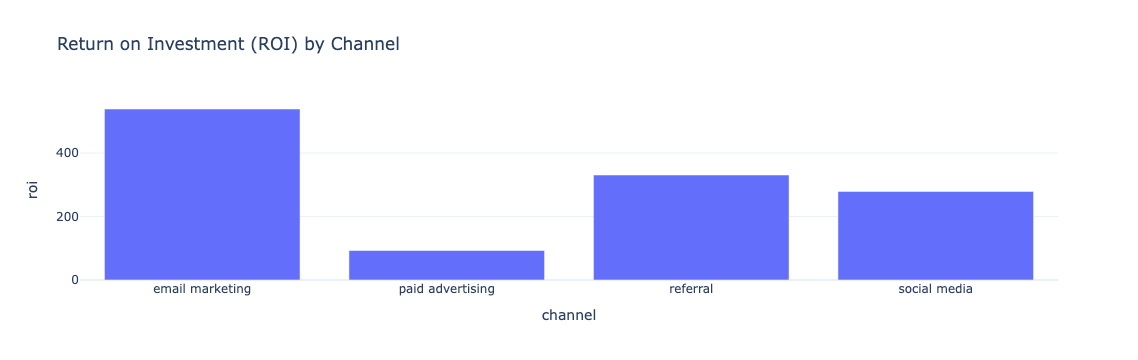

In [57]:
data['roi'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

fig = px.bar(roi_by_channel, 
             x='channel', 
             y='roi', title='Return on Investment (ROI) by Channel')
fig.show()